Extracting the File:

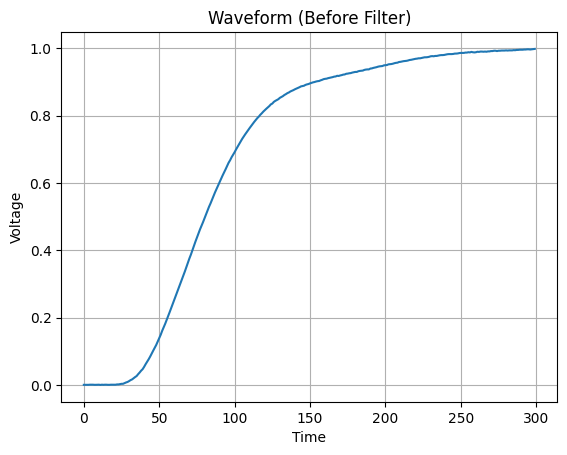

In [5]:
#Plot for given waveform (coeff.npy):
import numpy as np
import matplotlib.pyplot as plt

#given waveform:
coeff = np.load('coeff.npy') #array of values: measured step responce of old output stage

#plot:
plt.plot(coeff)
plt.title('Waveform (Before Filter)')
plt.xlabel('Time') #span 17.5 μs in total
plt.ylabel('Voltage')
plt.grid(True)
plt.show()

Imports:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft

Function for Filter Simulation:

In [31]:
class FilterSimulation():
    
    def filter(self):
        step_response = np.load('coeff.npy') # can be changed to a different filter hardware--this is provided by my boss
        impulse_response = np.diff(step_response, prepend = 0)
        return impulse_response

    def convolution(self, waveform):
        impulse_response = self.filter() # step response = derivative of impulse response
        filtered_waveform = np.convolve(waveform, impulse_response, mode = 'same') # f(t) = h(t) * g(t)
        return filtered_waveform
        
    def plotting(self, original, filtered_uncompensated, unfiltered_precompensated, filtered_precompensated):
        plt.figure()
        plt.plot(original, label = 'Original')
        plt.plot(filtered_uncompensated, label = 'filtered_uncompensated')
        plt.plot(unfiltered_precompensated, label = 'unfiltered_precompensated', linestyle = '--')
        plt.plot(filtered_precompensated, label = 'filtered_precompensated', linestyle = '--')
        plt.title('Lowpass-Filter Response')
        plt.xlabel('Time in µs')
        plt.ylabel('Voltage')
        plt.grid(True)
        plt.xlim(-50, 200)
        plt.ylim(-30, 30)
        plt.legend()
        plt.show()

Precompensation Mathematics:

In [15]:
class FilterMath():
    def transfer_function(self):
        impulse_response = FilterSimulation().filter()
        G = fft(impulse_response)
        return G
    
    def precompensation(self, signal, G):
        f_t = signal
        f_w = fft(f_t)
        h_w = f_w / G
        h_t = ifft(h_w)
        return h_t

Use Case:

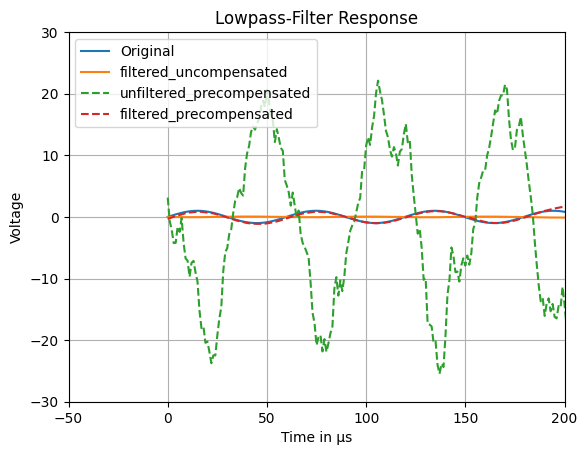

In [40]:
t = np. linspace(0, 5, 300)
original = np.sin(2 * np.pi * 1 * t)

G = FilterMath().transfer_function()
h_t = -FilterMath().precompensation(original, G)

unfiltered_precompensated = np.real(h_t)
filtered_uncompensated = FilterSimulation().convolution(original)
filtered_precompensated = FilterSimulation().convolution(unfiltered_precompensated)

FilterSimulation().plotting(original, filtered_uncompensated, unfiltered_precompensated, filtered_precompensated)